 ## **[코드 내용]**
 
 ### 0. 공통 코드 부분 (필요한 라이브러링 설치 및 자연어처리)
 
 
 ### 1. 토픽 모델링 
    
    
 ### 2. 감정분석
   

# 0. 공통 코드 부분(필요한 라이브러리 설치, 자연어 처리)

## 필요한 라이브러리 설치

In [73]:
 !pip install networkx
 !pip install gensim
 !pip install pyLDAvis
 !pip install xlsxwriter
 !pip install nltk
 !pip install numpy

In [1]:
import re
import json
import pandas as pd
import xlsxwriter
import numpy as np

In [2]:
# 아래 명령어를 사용하여서 site-package 위치를 확인
import site; site.getsitepackages() 

['c:\\users\\smell\\anaconda3\\envs\\py37',
 'c:\\users\\smell\\anaconda3\\envs\\py37\\lib\\site-packages']

In [3]:
from konlpy.tag import Mecab
mecab=Mecab(dicpath='C:/mecab/mecab-ko-dic')
mecab.pos('형태소 분석기가 제대로 설치 되었습니다.')

[('형태소', 'NNG'),
 ('분석기', 'NNG'),
 ('가', 'JKS'),
 ('제대로', 'MAG'),
 ('설치', 'NNG'),
 ('되', 'XSV'),
 ('었', 'EP'),
 ('습니다', 'EF'),
 ('.', 'SF')]

In [4]:
with open("C:/mecab/user-dic/nnp2.csv", 'r', encoding='utf-8') as f: 
    file_data = f.readlines()
file_data# 유사도 에서 

['대우,,,,NNP,*,F,대우,*,*,*,*,*\n',
 '구글,,,,NNP,*,T,구글,*,*,*,*,*\n',
 '아디다스,,,,NNP,*,F,아디다스,*,*,*,*,*\n',
 'sk매직,,,,NNP,*,T,sk매직,*,*,*,*,*\n',
 '전자레인지,,,,NNG,*,T,전자레인지,*,*,*,*,*\n',
 '가성비,,,,NNP,*,T,가성비,*,*,*,*,*  \n',
 '파트너스,,,,NNP,*,F,파트너스,*,*,*,*,*   \n',
 '차일드락,,,,NNP,*,T,차일드락,*,*,*,*,*\n',
 '토스트기,,,,NNP,*,F,토스트기,*,*,*,*,*\n',
 '롯데닷컴,,,,NNP,*,T,롯데닷컴,*,*,*,*,*\n',
 '지마켓,,,,NNP,*,T,지마켓,*,*,*,*,*\n',
 '에어프라이기,,,,NNP,*,F,에어프라이기,*,*,*,*,*\n',
 '동양매직,,,,NNP,*,T,동양매직,*,*,*,*,*    \n',
 '최애템,,,,NNP,*,T,최애템,*,*,*,*,* \n',
 '핫템,,,,NNP,*,T,핫템,*,*,*,*,* \n',
 '꿀템,,,,NNP,*,T,꿀템,*,*,*,*,* \n',
 '대박템,,,,NNP,*,T,대박템,*,*,*,*,* \n',
 '광파오븐,,,,NNP,*,T,광파오븐,*,*,*,*,* \n',
 '스마일데이,,,,NNP,*,T,스마일데이,*,*,*,*,* \n',
 '전자식,,,,NNP,*,T,전자식,*,*,*,*,* \n',
 '로켓배송,,,,NNP,*,T,로켓배송,*,*,*,*,* \n',
 '복합오븐,,,,NNP,*,T,복합오븐,*,*,*,*,*\n',
 '멀티오븐,,,,NNP,*,T,멀티오븐,*,*,*,*,* \n',
 '전기오븐,,,,NNP,*,T,전기오븐,*,*,*,*,* \n',
 '스팀오븐,,,,NNP,*,T,스팀오븐,*,*,*,*,* \n',
 '초단위,,,,NNP,*,T,초단위,*,*,*,*,* \n',
 '분단위,,,,NNP,*,T,분단위,*,*,*,*,* \n',
 

In [5]:
# file_data.append('LG,,,,SL,*,F,LG,*,*,*,*,*\n') ## 원하는 단어 추가 
# file_data.append('베이컨,,,,NNP,*,T,베이컨,*,*,*,*,*\n')
# 초단위
# 분단위
with open("C:/mecab/user-dic/nnp.csv", 'w', encoding='utf-8') as f: 
    for line in file_data: 
        f.write(line)
        
f.close()

file_data

#nnp 

['대우,,,,NNP,*,F,대우,*,*,*,*,*\n',
 '구글,,,,NNP,*,T,구글,*,*,*,*,*\n',
 '아디다스,,,,NNP,*,F,아디다스,*,*,*,*,*\n',
 'sk매직,,,,NNP,*,T,sk매직,*,*,*,*,*\n',
 '전자레인지,,,,NNG,*,T,전자레인지,*,*,*,*,*\n',
 '가성비,,,,NNP,*,T,가성비,*,*,*,*,*  \n',
 '파트너스,,,,NNP,*,F,파트너스,*,*,*,*,*   \n',
 '차일드락,,,,NNP,*,T,차일드락,*,*,*,*,*\n',
 '토스트기,,,,NNP,*,F,토스트기,*,*,*,*,*\n',
 '롯데닷컴,,,,NNP,*,T,롯데닷컴,*,*,*,*,*\n',
 '지마켓,,,,NNP,*,T,지마켓,*,*,*,*,*\n',
 '에어프라이기,,,,NNP,*,F,에어프라이기,*,*,*,*,*\n',
 '동양매직,,,,NNP,*,T,동양매직,*,*,*,*,*    \n',
 '최애템,,,,NNP,*,T,최애템,*,*,*,*,* \n',
 '핫템,,,,NNP,*,T,핫템,*,*,*,*,* \n',
 '꿀템,,,,NNP,*,T,꿀템,*,*,*,*,* \n',
 '대박템,,,,NNP,*,T,대박템,*,*,*,*,* \n',
 '광파오븐,,,,NNP,*,T,광파오븐,*,*,*,*,* \n',
 '스마일데이,,,,NNP,*,T,스마일데이,*,*,*,*,* \n',
 '전자식,,,,NNP,*,T,전자식,*,*,*,*,* \n',
 '로켓배송,,,,NNP,*,T,로켓배송,*,*,*,*,* \n',
 '복합오븐,,,,NNP,*,T,복합오븐,*,*,*,*,*\n',
 '멀티오븐,,,,NNP,*,T,멀티오븐,*,*,*,*,* \n',
 '전기오븐,,,,NNP,*,T,전기오븐,*,*,*,*,* \n',
 '스팀오븐,,,,NNP,*,T,스팀오븐,*,*,*,*,* \n',
 '초단위,,,,NNP,*,T,초단위,*,*,*,*,* \n',
 '분단위,,,,NNP,*,T,분단위,*,*,*,*,* \n',
 

In [6]:
with open("C:/mecab/mecab-ko-dic/user-nnp2.csv", 'r', encoding='utf-8') as f: 
    file_data = f.readlines()
file_data

['대우,1786,3545,3821,NNP,*,F,대우,*,*,*,*,*\n',
 '구글,1786,3546,2953,NNP,*,T,구글,*,*,*,*,*\n',
 '아디다스,1786,3545,0,NNP,*,F,아디다스,*,*,*,*,*\n',
 'sk매직,1786,3546,1,NNP,*,T,sk매직,*,*,*,*,*\n',
 '전자레인지,1780,3534,2,NNG,*,T,전자레인지,*,*,*,*,*\n',
 '가성비,1786,3546,3,NNP,*,T,가성비,*,*,*,*,*  \n',
 '파트너스,1786,3545,4,NNP,*,F,파트너스,*,*,*,*,*   \n',
 '차일드락,1786,3546,5,NNP,*,T,차일드락,*,*,*,*,*\n',
 '토스트기,1786,3545,6,NNP,*,F,토스트기,*,*,*,*,*\n',
 '롯데닷컴,1786,3546,7,NNP,*,T,롯데닷컴,*,*,*,*,*\n',
 '지마켓,1786,3546,8,NNP,*,T,지마켓,*,*,*,*,*\n',
 '에어프라이기,1786,3545,9,NNP,*,F,에어프라이기,*,*,*,*,*\n',
 '동양매직,1786,3546,10,NNP,*,T,동양매직,*,*,*,*,*    \n',
 '최애템,1786,3546,11,NNP,*,T,최애템,*,*,*,*,* \n',
 '핫템,1786,3546,12,NNP,*,T,핫템,*,*,*,*,* \n',
 '꿀템,1786,3546,13,NNP,*,T,꿀템,*,*,*,*,* \n',
 '대박템,1786,3546,14,NNP,*,T,대박템,*,*,*,*,* \n',
 '광파오븐,1786,3546,15,NNP,*,T,광파오븐,*,*,*,*,* \n',
 '스마일데이,1786,3546,16,NNP,*,T,스마일데이,*,*,*,*,* \n',
 '전자식,1786,3546,17,NNP,*,T,전자식,*,*,*,*,* \n',
 '로켓배송,1786,3546,18,NNP,*,T,로켓배송,*,*,*,*,* \n',
 '복합오븐,1786,3546,19,

In [7]:
with open("C:/mecab/mecab-ko-dic/user-nnp.csv", 'w', encoding='utf-8') as f: 
    for line in file_data: 
        f.write(line)
with open("C:/mecab/mecab-ko-dic/user-nnp.csv", 'r', encoding='utf-8') as f: 
    file_data = f.readlines()
    
file_data

['대우,1786,3545,3821,NNP,*,F,대우,*,*,*,*,*\n',
 '구글,1786,3546,2953,NNP,*,T,구글,*,*,*,*,*\n',
 '아디다스,1786,3545,0,NNP,*,F,아디다스,*,*,*,*,*\n',
 'sk매직,1786,3546,1,NNP,*,T,sk매직,*,*,*,*,*\n',
 '전자레인지,1780,3534,2,NNG,*,T,전자레인지,*,*,*,*,*\n',
 '가성비,1786,3546,3,NNP,*,T,가성비,*,*,*,*,*  \n',
 '파트너스,1786,3545,4,NNP,*,F,파트너스,*,*,*,*,*   \n',
 '차일드락,1786,3546,5,NNP,*,T,차일드락,*,*,*,*,*\n',
 '토스트기,1786,3545,6,NNP,*,F,토스트기,*,*,*,*,*\n',
 '롯데닷컴,1786,3546,7,NNP,*,T,롯데닷컴,*,*,*,*,*\n',
 '지마켓,1786,3546,8,NNP,*,T,지마켓,*,*,*,*,*\n',
 '에어프라이기,1786,3545,9,NNP,*,F,에어프라이기,*,*,*,*,*\n',
 '동양매직,1786,3546,10,NNP,*,T,동양매직,*,*,*,*,*    \n',
 '최애템,1786,3546,11,NNP,*,T,최애템,*,*,*,*,* \n',
 '핫템,1786,3546,12,NNP,*,T,핫템,*,*,*,*,* \n',
 '꿀템,1786,3546,13,NNP,*,T,꿀템,*,*,*,*,* \n',
 '대박템,1786,3546,14,NNP,*,T,대박템,*,*,*,*,* \n',
 '광파오븐,1786,3546,15,NNP,*,T,광파오븐,*,*,*,*,* \n',
 '스마일데이,1786,3546,16,NNP,*,T,스마일데이,*,*,*,*,* \n',
 '전자식,1786,3546,17,NNP,*,T,전자식,*,*,*,*,* \n',
 '로켓배송,1786,3546,18,NNP,*,T,로켓배송,*,*,*,*,* \n',
 '복합오븐,1786,3546,19,

In [8]:
# 완료가 되면 이렇게 확인 가능합니다. 

from konlpy.tag import Mecab

mecab=Mecab(dicpath='C:/mecab/mecab-ko-dic')
print(mecab.pos('가스레인지'))
print(mecab.pos('전자레인지'))

[('가스레인지', 'NNG')]
[('전자레인지', 'NNG')]


In [2]:
import pandas as pd

### option A: 네이버 블로그 csv파일 불러올 때는 이하의 코드를 실행한 후 optionB (쇼핑후기) 코드는 건너뛰고 바로 공통 코드로 이동

In [116]:
blog_df = pd.read_csv('SK_Microwave(블로그).csv', encoding='utf-8-sig')

In [117]:
blog_df = blog_df.sort_values(by='Post Date' ,ascending=True) # post Date를 기준으로 오름차순으로 정렬
blog_df['Post Date'] = [str(dates).replace('.0','') for dates in blog_df['Post Date']] # 분석을 위해서 날짜의 형식을 변경함. 

In [118]:
# 문서에 'Post Date'에서 빈칸을 nan (빈데이터)를 찾아주고 삭제해주는 과정 = 나중에 분석에 오류를 없애기 위해서
drop_index = blog_df['Post Date'][blog_df['Post Date']=='nan'].index
d = [d for d in drop_index] 
print(d, '\n') # 아래 결과 예) 751 번째 행의 날짜가 nan으로 표시 되어있음을 알 수 있음. 

blog_df.drop(d, axis=0, inplace=True) # nan 데이터가 있는 행을 삭제해줌.
print(blog_df.shape)

[] 

(570, 7)


In [119]:
# 필요한 부분만 편집해서 가져오기. 
# 블로그 데이터 파일에서 블로그 제목인 'Title'과 블로그 내용인 'Description' 및 게시일인 'Post Date'에 해당하는 부분만 가져와 저장.
tm_post = blog_df.get('Title') + " " + blog_df.get('Description')
tm_post_date = blog_df.get('Post Date')

tm_post

397    SK 매직 전자레인지 구매 후기 떡하니 매직이라고 인쇄 되어있고 뒤엔 KC마크가 듬...
414    11번가 SK매직 전자레인지 MWO-230KG 신제품 런칭기념 이벤트 오늘은 SK매...
519    [전자레인지] SK매직 전자레인지 MWO-20M7 스마트한 요리을...  스마트한 ...
92     기본 성능이 뛰어나다! SK매직 전자레인지 MWO-230KG 후기!! 음식을 데우고...
88     간편한 조리는 SK매직 전자레인지 MWO-23KG 그동안 전자레인지 없이 살아왔는데...
                             ...                        
236    개성있는 SK매직 자동요리 전자식 전자레인지 선택해하셔요 11시 1분 6초 포스팅 ...
320    모두가 추천하는 SK매직 ALL IN ONE 멀티오븐 전자레인지...  모두가 추천...
131    요즘인기인 SK매직 ALL IN ONE 멀티오븐 전자레인지 버튼...  #멀티오븐 ...
510    EONB401SA SK매직 빌트인 스팀 오븐 프리미엄 살려드립니다 SK매직 스팀 오...
503    부산정수기렌탈 SK매직의 놀라움! 부산정수기렌탈 SK매직의 놀라움! 여러분 안녕하세...
Length: 570, dtype: object

In [120]:

    import pandas as pd

In [121]:
# tm_post 전처리
# 이거 주석 처리하라는 건가? 
# print(tm_post.isnull().values.any()) # 빈 행이 있는지 확인하기 ( 뒤에 에러가 날 수 있음 ) 
# print(tm_post.isnull().sum()) # null 값이 총 몇개가 있는지 확인 

# tm_post = tm_post.dropna(how = 'any') # Null 값이 존재하는 행을 제거

In [122]:
tm_post

397    SK 매직 전자레인지 구매 후기 떡하니 매직이라고 인쇄 되어있고 뒤엔 KC마크가 듬...
414    11번가 SK매직 전자레인지 MWO-230KG 신제품 런칭기념 이벤트 오늘은 SK매...
519    [전자레인지] SK매직 전자레인지 MWO-20M7 스마트한 요리을...  스마트한 ...
92     기본 성능이 뛰어나다! SK매직 전자레인지 MWO-230KG 후기!! 음식을 데우고...
88     간편한 조리는 SK매직 전자레인지 MWO-23KG 그동안 전자레인지 없이 살아왔는데...
                             ...                        
236    개성있는 SK매직 자동요리 전자식 전자레인지 선택해하셔요 11시 1분 6초 포스팅 ...
320    모두가 추천하는 SK매직 ALL IN ONE 멀티오븐 전자레인지...  모두가 추천...
131    요즘인기인 SK매직 ALL IN ONE 멀티오븐 전자레인지 버튼...  #멀티오븐 ...
510    EONB401SA SK매직 빌트인 스팀 오븐 프리미엄 살려드립니다 SK매직 스팀 오...
503    부산정수기렌탈 SK매직의 놀라움! 부산정수기렌탈 SK매직의 놀라움! 여러분 안녕하세...
Length: 570, dtype: object

### 공통: 여기에서부터는 optionA (블로그) 및 optionB(쇼핑후기) 공통으로 진행하는 코드

In [123]:

tm_post.head()  # 첫 5행 보여주기

397    SK 매직 전자레인지 구매 후기 떡하니 매직이라고 인쇄 되어있고 뒤엔 KC마크가 듬...
414    11번가 SK매직 전자레인지 MWO-230KG 신제품 런칭기념 이벤트 오늘은 SK매...
519    [전자레인지] SK매직 전자레인지 MWO-20M7 스마트한 요리을...  스마트한 ...
92     기본 성능이 뛰어나다! SK매직 전자레인지 MWO-230KG 후기!! 음식을 데우고...
88     간편한 조리는 SK매직 전자레인지 MWO-23KG 그동안 전자레인지 없이 살아왔는데...
dtype: object

In [124]:
tm_post.tail()  # 마지막 5행 보여주기

236    개성있는 SK매직 자동요리 전자식 전자레인지 선택해하셔요 11시 1분 6초 포스팅 ...
320    모두가 추천하는 SK매직 ALL IN ONE 멀티오븐 전자레인지...  모두가 추천...
131    요즘인기인 SK매직 ALL IN ONE 멀티오븐 전자레인지 버튼...  #멀티오븐 ...
510    EONB401SA SK매직 빌트인 스팀 오븐 프리미엄 살려드립니다 SK매직 스팀 오...
503    부산정수기렌탈 SK매직의 놀라움! 부산정수기렌탈 SK매직의 놀라움! 여러분 안녕하세...
dtype: object

In [125]:
tm_post_date.max()   # 최대 날짜 (가장 최근 데이터)

'20211014'

In [126]:
tm_post_date.min()  # 최소 날짜 (가장 오래된 데이터)

'20161214'

In [127]:
# tm_post 전처리
# 이거 주석 처리? 
# print(tm_post.isnull().values.any()) # 빈 행이 있는지 확인하기 ( 뒤에 에러가 날 수 있음 ) 
# print(tm_post.isnull().sum()) # null 값이 총 몇개가 있는지 확인 

# tm_post = tm_post.dropna(how = 'any') # Null 값이 존재하는 행을 제거

In [128]:
len(tm_post)

570

In [129]:
import re

def cleanText(datas): # 단어 전처리
    data1 = re.sub('[^A-Za-z0-9가-힣;,.?!]', ' ', datas)
    data1 = data1.lower() # 영어 소문자로 변환 
    data1 = data1.replace(' 전자레인지', ' 전자레인지 ') #검색어 띄어쓰기 붙여주기
    data1 = data1.replace('전자레인지 ', ' 전자레인지 ') #검색어 띄어쓰기 붙여주기
    data1 = data1.replace('  ', ' ')
    data1 = data1.replace('렌지', '레인지')
    data1 = data1.replace('매직', 'SK매직')
    data1 = data1.replace('프라이', '에어프라이기')
    data1 = data1.replace('삼성', '삼성전자')
    data1 = data1.replace('동양', '동양매직')
    data2 = data1.split()
    return data1

In [130]:
tm_posts = []
for posts in tm_post:
    post = cleanText(posts)
    post1 = ' '.join(post)
    tm_posts.append(post)
    
tm_posts[:3]

['sk SK매직 전자레인지 구매 후기 떡하니 SK매직이라고 인쇄 되어있고 뒤엔 kc마크가 듬직합니다. 어? 왜 설명서가 없지 했는데 전자레인지 내부에 있었습니다. 설마 했습니다. 유리 돌림판과 설명서가 있으니 조립을 해봐야겠습니다. 딱 심플... ',
 '11번가 skSK매직 전자레인지 mwo 230kg 신제품 런칭기념 이벤트 오늘은 skSK매직 전자레인지 신제품 런칭 이밴트로 찾아왔습니다. 따끈따끈한 2017년형 모델이... 120명에게 전자레인지 용기 포토 후기를 남기면 추첨을 통해 20명에게 skSK매직제품 믹서기를... ',
 ' 전자레인지  skSK매직 전자레인지 mwo 20m7 스마트한 요리을... 스마트한 요리를 위한 선택 skSK매직 전자레인지 대표모델 mwo 20m7 간편한 요리를 위한 전자레인지 mwo 20m7 입니다. mwo 20m7']

In [131]:
# 형태소 분석기 Mecab 불러오기

from konlpy.tag import Mecab

tagger = Mecab(dicpath='C:/mecab/mecab-ko-dic')

In [132]:
# 각자 데이터에 맞는 불용어를 추가하여 불용어 처리.
tm_stop_words = "식 다음 때문 원 만 비 시 정도 년 추 평 매직 이걸 건데 끼 덤 호 처 넌 저작 어디 딜 차제 링 마 용 프라이어 세기 전자 레인지 대백과 모델 편 겸 건네 타입 작성 에어 확인 금일 업소 기준 폼 풍동 내산 타입 월 디오스 하나 돈 가전 번호 침 그때 주전 슝 왕 실 이제 라온 합 에스 쉐어 아일랜드 의 벽 배 세 랜드 떨이 中 바 건 거기 이번 등 점 리 밑 슝 떨 저 것 후 날 맘 게 전 중 수 내 거 일 중 박 종 글 가지 요즘 때 나 구 위 번 기이기 제 명 번 개 듯 달 이 문 안 구 나 말 달 수아 율 슝 이때 작 컨 데 듯 션 안 기 갑 간 법 판 닷컴 몰 곳 걸 기 입니다 지 장 벡 주 남 로 겟 달 메 힌 할 요걸로  당 컴 부 조 쓰 첸 데움 외 ㄷ 무엇 망 하심 놓 랙 하 크롬 스와 팟 드 리스 너 쟌 줄 렌 단 렴 꺼 난 색 랑 리 상 천 걸로 맨 반 진영 가심 를 질 언 채 급 통   성애 저기 듯이 여기저기 떨 지기 산점 에프  서이  뿐  속 등등 대 도 트 직수 인"
tm_stop_words = tm_stop_words.split(' ')
print(tm_stop_words) # 초 분 살리기 

['식', '다음', '때문', '원', '만', '비', '시', '정도', '년', '추', '평', '매직', '이걸', '건데', '끼', '덤', '호', '처', '넌', '저작', '어디', '딜', '차제', '링', '마', '용', '프라이어', '세기', '전자', '레인지', '대백과', '모델', '편', '겸', '건네', '타입', '작성', '에어', '확인', '금일', '업소', '기준', '폼', '풍동', '내산', '타입', '월', '디오스', '하나', '돈', '가전', '번호', '침', '그때', '주전', '슝', '왕', '실', '이제', '라온', '합', '에스', '쉐어', '아일랜드', '의', '벽', '배', '세', '랜드', '떨이', '中', '바', '건', '거기', '이번', '등', '점', '리', '밑', '슝', '떨', '저', '것', '후', '날', '맘', '게', '전', '중', '수', '내', '거', '일', '중', '박', '종', '글', '가지', '요즘', '때', '나', '구', '위', '번', '기이기', '제', '명', '번', '개', '듯', '달', '이', '문', '안', '구', '나', '말', '달', '수아', '율', '슝', '이때', '작', '컨', '데', '듯', '션', '안', '기', '갑', '간', '법', '판', '닷컴', '몰', '곳', '걸', '기', '입니다', '지', '장', '벡', '주', '남', '로', '겟', '달', '메', '힌', '할', '요걸로', '', '당', '컴', '부', '조', '쓰', '첸', '데움', '외', 'ㄷ', '무엇', '망', '하심', '놓', '랙', '하', '크롬', '스와', '팟', '드', '리스', '너', '쟌', '줄', '렌', '단', '렴', '꺼', '난', '색', '랑', '리', '상', '천', '걸로', '맨',

In [133]:

    # 불용어를 제외한 텍스트의 형태소 분석 수행

words = []
for post in tm_posts:
 words.extend(tagger.pos(post))
    
words[0:10]

[('sk', 'SL'),
 ('SK매직', 'NNP'),
 ('전자레인지', 'NNG'),
 ('구매', 'NNG'),
 ('후기', 'NNG'),
 ('떡하니', 'MAG'),
 ('SK매직', 'NNP'),
 ('이', 'VCP'),
 ('라고', 'EC'),
 ('인쇄', 'NNG')]

In [134]:
tm_nouns = []   # 명사 추출하기
for post in tm_posts:
        if type(post) == str:
            for noun in tagger.nouns(post):
                if noun not in tm_stop_words:
                    tm_nouns.append(noun)
            
tm_nouns[0:10]

['SK매직', '전자레인지', '구매', '후기', 'SK매직', '인쇄', '뒤', '마크', '설명서', '전자레인지']

In [135]:
from collections import Counter  # 상위 30개 명사 추출
num_top_nouns = 30
tm_nouns_counter = Counter(tm_nouns)
tm_top_nouns = tm_nouns_counter.most_common(num_top_nouns)

print(tm_top_nouns)

[('전자레인지', 1738), ('제품', 220), ('오븐', 201), ('구매', 165), ('추천', 164), ('다이얼', 145), ('SK매직', 143), ('사용', 143), ('고급', 134), ('요리', 128), ('후기', 127), ('기능', 107), ('가성비', 99), ('광파오븐', 89), ('버튼', 88), ('에어프라이기', 77), ('분', 74), ('자동', 73), ('가격', 71), ('구입', 69), ('집', 68), ('상품', 66), ('초', 62), ('전자식', 61), ('디자인', 59), ('핸들', 56), ('정보', 47), ('필요', 46), ('소개', 45), ('멀티오븐', 42)]


# 1. 토픽 모델링(Topic Modeling)


## Gensim 라이브러리 설치 및 단어 매핑 
토픽 모델링을 사용하기 위해서는 gensim 라이브러리를 사용해야 한다. gensim을 사용하기 위해서 pip install gensim 명령어를 통해 라이브러리를 설치한다. 

In [136]:
tm_stop_words.extend(['깔', '뒤','랑','리','데','팟','위','달','곳','제','반','걸','돈','놈', '평', '뿐', '잔', '문', '난', '구', '문', '욜', '도', '편', '풍동' ,'건', '짝']) # 제외하고 싶은 명사 불용어 리스트에 추가하기 (**)
# 명사 추가로 없애기 
# 여기다가 불용어!!!!! 
tm_nouns = []   # 명사 추출하기
nouns = []
for post in tm_posts:
    if type(post) == str:
        for noun in tagger.nouns(post):
            if noun not in tm_stop_words:
                nouns.append(noun)
        tm_nouns.append(nouns)
    else:
        tm_nouns.append(['nouns'])
        
tm_nouns[0]

['SK매직',
 '전자레인지',
 '구매',
 '후기',
 'SK매직',
 '인쇄',
 '마크',
 '설명서',
 '전자레인지',
 '내부',
 '유리',
 '돌림판',
 '설명서',
 '조립',
 '심플',
 '전자레인지',
 '제품',
 '런',
 '칭',
 '기념',
 '이벤트',
 '오늘',
 '전자레인지',
 '제품',
 '런',
 '밴',
 '전자레인지',
 '용기',
 '포토',
 '후기',
 '추첨',
 '제품',
 '믹',
 '서기',
 '전자레인지',
 '전자레인지',
 '스마트',
 '요리',
 '스마트',
 '요리',
 '선택',
 '전자레인지',
 '대표',
 '요리',
 '전자레인지',
 '기본',
 '성능',
 '전자레인지',
 '후기',
 '음식',
 '해동',
 '기능',
 '전자레인지',
 '후기',
 '봉기',
 '마무리',
 '총평',
 '마무리',
 '제품',
 '전자레인지',
 '기본',
 '성능',
 '조리',
 '전자레인지',
 '그동안',
 '전자레인지',
 '저희',
 '집',
 '식구',
 '전자레인지',
 '무게',
 '음식',
 '자유',
 '조리',
 '기능',
 '조그',
 '다이얼',
 '이용',
 '전자레인지',
 '스마트',
 '오븐',
 '겸용',
 '전자레인지',
 '전자레인지',
 '마련',
 '품명',
 '디자인',
 '전자레인지',
 '추천',
 '전자레인지',
 '미니',
 '라이프',
 '심플',
 '느낌',
 '전자레인지',
 '택배',
 '유용',
 '사용',
 '전자레인지',
 '냉장고',
 '보관',
 '카레',
 '전자레인지',
 '리뷰',
 '심플',
 '전자레인지',
 '충실',
 '전자레인지',
 '소개',
 '문구',
 '낯',
 '메이커',
 '예전',
 '동양매직',
 'SK매직',
 '생각',
 '주방',
 '제품',
 '집',
 '전자레인지',
 '다양',
 '제품',
 '가정',
 '요리',
 '유용',
 '전자레인지',
 '전자레인지',
 '무게',
 '해동'

In [137]:
# bigram 및 trigram 추출 

import gensim
tm_bigram = gensim.models.Phrases(tm_nouns)
tm_trigram = gensim.models.Phrases(tm_bigram[tm_nouns])
tm_bigram_model = gensim.models.phrases.Phraser(tm_bigram)
tm_trigram_model = gensim.models.phrases.Phraser(tm_trigram)

In [138]:
from gensim import corpora

tm_bigram_document = [tm_bigram_model[nouns] for nouns in tm_nouns]
tm_bigram_document[2]

['SK매직',
 '전자레인지',
 '구매',
 '후기',
 'SK매직',
 '인쇄',
 '마크',
 '설명서',
 '전자레인지',
 '내부',
 '유리',
 '돌림판',
 '설명서',
 '조립',
 '심플',
 '전자레인지',
 '제품',
 '런',
 '칭',
 '기념',
 '이벤트',
 '오늘',
 '전자레인지',
 '제품',
 '런',
 '밴',
 '전자레인지',
 '용기',
 '포토',
 '후기',
 '추첨',
 '제품',
 '믹',
 '서기',
 '전자레인지',
 '전자레인지',
 '스마트',
 '요리',
 '스마트',
 '요리',
 '선택',
 '전자레인지',
 '대표',
 '요리',
 '전자레인지',
 '기본',
 '성능',
 '전자레인지',
 '후기',
 '음식',
 '해동',
 '기능',
 '전자레인지',
 '후기',
 '봉기',
 '마무리',
 '총평',
 '마무리',
 '제품',
 '전자레인지',
 '기본',
 '성능',
 '조리',
 '전자레인지',
 '그동안',
 '전자레인지',
 '저희',
 '집',
 '식구',
 '전자레인지',
 '무게',
 '음식',
 '자유',
 '조리',
 '기능',
 '조그',
 '다이얼',
 '이용',
 '전자레인지',
 '스마트',
 '오븐',
 '겸용',
 '전자레인지',
 '전자레인지',
 '마련',
 '품명',
 '디자인',
 '전자레인지',
 '추천',
 '전자레인지',
 '미니',
 '라이프',
 '심플',
 '느낌',
 '전자레인지',
 '택배',
 '유용',
 '사용',
 '전자레인지',
 '냉장고',
 '보관',
 '카레',
 '전자레인지',
 '리뷰',
 '심플',
 '전자레인지',
 '충실',
 '전자레인지',
 '소개',
 '문구',
 '낯',
 '메이커',
 '예전',
 '동양매직',
 'SK매직',
 '생각',
 '주방',
 '제품',
 '집',
 '전자레인지',
 '다양',
 '제품',
 '가정',
 '요리',
 '유용',
 '전자레인지',
 '전자레인지',
 '무게',
 '해동'

In [139]:
# 사전(ditionary) 형식으로 변환

tm_id2word = corpora.Dictionary(tm_bigram_document)
tm_corpus = [tm_id2word.doc2bow(doc) for doc in tm_bigram_document]
tm_corpus[0]

[(0, 143),
 (1, 5),
 (2, 18),
 (3, 71),
 (4, 8),
 (5, 5),
 (6, 39),
 (7, 1),
 (8, 2),
 (9, 99),
 (10, 2),
 (11, 21),
 (12, 1),
 (13, 1),
 (14, 1),
 (15, 1),
 (16, 3),
 (17, 17),
 (18, 16),
 (19, 2),
 (20, 1),
 (21, 1),
 (22, 2),
 (23, 2),
 (24, 1),
 (25, 1),
 (26, 2),
 (27, 7),
 (28, 1),
 (29, 1),
 (30, 4),
 (31, 1),
 (32, 1),
 (33, 5),
 (34, 2),
 (35, 1),
 (36, 2),
 (37, 4),
 (38, 1),
 (39, 1),
 (40, 2),
 (41, 8),
 (42, 2),
 (43, 1),
 (44, 1),
 (45, 20),
 (46, 2),
 (47, 5),
 (48, 1),
 (49, 1),
 (50, 2),
 (51, 14),
 (52, 1),
 (53, 1),
 (54, 1),
 (55, 1),
 (56, 1),
 (57, 1),
 (58, 1),
 (59, 1),
 (60, 1),
 (61, 1),
 (62, 1),
 (63, 7),
 (64, 1),
 (65, 1),
 (66, 6),
 (67, 7),
 (68, 6),
 (69, 1),
 (70, 2),
 (71, 4),
 (72, 1),
 (73, 1),
 (74, 1),
 (75, 1),
 (76, 3),
 (77, 1),
 (78, 1),
 (79, 3),
 (80, 134),
 (81, 1),
 (82, 4),
 (83, 18),
 (84, 1),
 (85, 14),
 (86, 5),
 (87, 1),
 (88, 1),
 (89, 11),
 (90, 1),
 (91, 2),
 (92, 5),
 (93, 2),
 (94, 1),
 (95, 6),
 (96, 2),
 (97, 1),
 (98, 1),
 (99

In [140]:
tm_id2word[3] #2000번째 단어가 무엇인지 확인

'가격'

In [32]:
pip install tqdm

Note: you may need to restart the kernel to use updated packages.


## Topic Coherence 계산
토픽 모델링을 수행함에 있어서 적절한 토픽의 갯수를 찾는 것이 중요하다. 2부터 9까지 값을 늘려가면서 LDA 모델을 생성하여 각 모델의 coherence를 계산한다. 그리고 적절한 토픽의 수는 토픽 개수를 늘려가며 높은 coherence score를 가지는 값으로 결정한다.

In [141]:
from gensim.models import CoherenceModel
from tqdm import tqdm

tm_coherence_score=[]
for i in tqdm(range(2,9)):     # 토픽 갯수 2개부터 8개까지의 정합지수 계산
    model = gensim.models.ldamodel.LdaModel(corpus=tm_corpus, id2word=tm_id2word, num_topics=i)
    coherence_model = CoherenceModel(model, texts=tm_bigram_document, dictionary=tm_id2word, coherence='c_v')
    coherence_lda = coherence_model.get_coherence()
    print('n=',i,'\nCoherence Score: ', coherence_lda)
    tm_coherence_score.append(coherence_lda)

 14%|████████████                                                                        | 1/7 [00:29<02:58, 29.82s/it]

n= 2 
Coherence Score:  0.22251166583293486


 29%|████████████████████████                                                            | 2/7 [01:00<02:31, 30.23s/it]

n= 3 
Coherence Score:  0.22381977403986894


 43%|████████████████████████████████████                                                | 3/7 [01:33<02:05, 31.45s/it]

n= 4 
Coherence Score:  0.2314831860770103


 57%|████████████████████████████████████████████████                                    | 4/7 [02:07<01:37, 32.44s/it]

n= 5 
Coherence Score:  0.2217855580866384


 71%|████████████████████████████████████████████████████████████                        | 5/7 [02:40<01:05, 32.87s/it]

n= 6 
Coherence Score:  0.22073547780306593


 86%|████████████████████████████████████████████████████████████████████████            | 6/7 [03:22<00:35, 35.75s/it]

n= 7 
Coherence Score:  0.22100276148447487


100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [04:02<00:00, 34.66s/it]

n= 8 
Coherence Score:  0.21526553022048237


토픽의 적절한 개수를 찾기 위해서 계산한 coherence score를 차트로 나타내서 살펴본다.

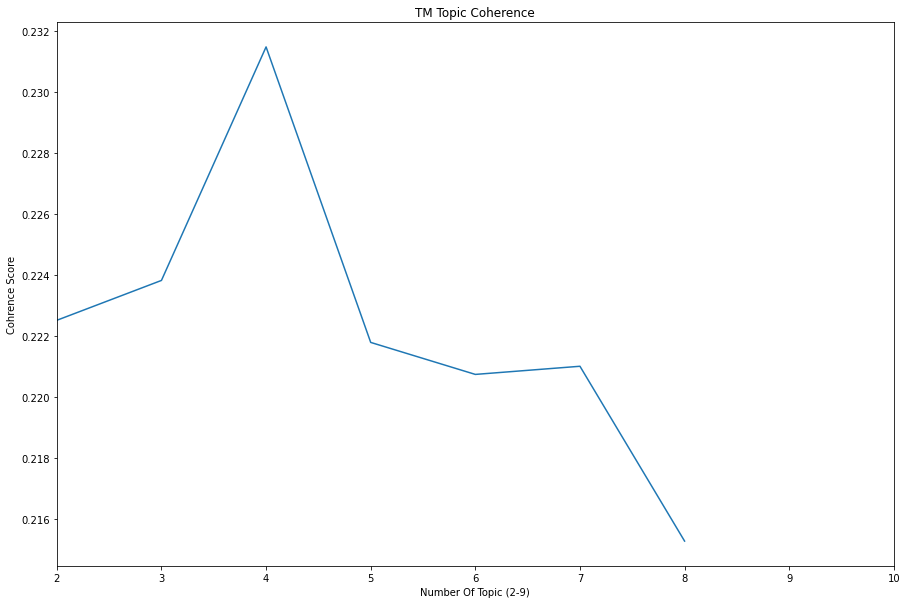

In [142]:
# 군집 분석 덩어리 개수 말하기 
# 보고싶은 단어의 뭐가 이야기 되느냐 위치 순서기 중요 -> x축 y축 안중요 
import matplotlib.pyplot as plt  
import numpy

k=[]
for i in range(2,9):
    k.append(i)

x=numpy.array(k)
y=numpy.array(tm_coherence_score)
plt.title('TM Topic Coherence')
plt.plot(x,y)
plt.xlim(2,10)
plt.xlabel('Number Of Topic (2-9)')
plt.ylabel('Cohrence Score')
plt.show()

#### 토픽의 갯수가 증가할수록 계속적으로 정합지수(coherence score)가 증가하는 추이를 보인다. 증가 추이에서 score가 계속 높아지다가 낮아지기 시작할 때, 낮아지기 직전의 가장 높은 값을 적절한 토픽의 갯수로 판단하고, LDA 모델을 생성한다.


In [145]:
tm_model = gensim.models.ldamodel.LdaModel(corpus=tm_corpus, id2word=tm_id2word, num_topics=4)
tm_model.print_topics()
tm_model.print_topics(num_words=30) # 각 토픽별 단어 수 설정
                                    # 모든 토픽에 전자레인진ㄴ 나올듯 그래서 공통 단어는 제거? 

[(0,
  '0.127*"전자레인지" + 0.025*"제품" + 0.023*"추천" + 0.022*"구매" + 0.020*"오븐" + 0.017*"SK매직" + 0.017*"다이얼" + 0.016*"사용" + 0.016*"요리" + 0.015*"고급" + 0.014*"광파오븐" + 0.012*"후기" + 0.011*"버튼" + 0.010*"기능" + 0.008*"가성비" + 0.008*"에어프라이기" + 0.007*"전자식" + 0.007*"초" + 0.007*"집" + 0.007*"상품" + 0.007*"자동" + 0.007*"분" + 0.007*"핸들" + 0.007*"디자인" + 0.006*"정보" + 0.005*"가격" + 0.005*"구입" + 0.005*"필요" + 0.004*"쿠팡" + 0.004*"멀티오븐"'),
 (1,
  '0.178*"전자레인지" + 0.023*"제품" + 0.023*"구매" + 0.020*"오븐" + 0.018*"추천" + 0.018*"고급" + 0.015*"SK매직" + 0.015*"다이얼" + 0.014*"사용" + 0.013*"기능" + 0.012*"가성비" + 0.011*"요리" + 0.009*"분" + 0.009*"후기" + 0.009*"상품" + 0.008*"에어프라이기" + 0.008*"자동" + 0.007*"광파오븐" + 0.007*"집" + 0.007*"버튼" + 0.007*"가격" + 0.006*"핸들" + 0.006*"전자식" + 0.006*"초" + 0.005*"소개" + 0.005*"멀티오븐" + 0.005*"정보" + 0.005*"구입" + 0.005*"올인원" + 0.005*"디자인"'),
 (2,
  '0.169*"전자레인지" + 0.021*"제품" + 0.020*"오븐" + 0.019*"추천" + 0.017*"고급" + 0.017*"다이얼" + 0.015*"사용" + 0.014*"후기" + 0.014*"구매" + 0.014*"요리" + 0.014*"기능" + 0.014*"SK매직" + 0.0

## pyLDAvis를 이용한 LDA 시각화 IDM
LDA를 시각화하기 pyLDAvis 라이브러리를 import 해야 한다. pyLDAvis 라이브러리는 명령어 pip install pyLDAvis를 이용하여 설치해야 한다. 설치가 완료되면 실제 생성한 모델을 가지고 토픽간 거리지도(IDM)으로 시각화한다. 

In [146]:
import pyLDAvis
import pyLDAvis.gensim_models as gensimvis

prepared_data = gensimvis.prepare(tm_model, tm_corpus, tm_id2word)
pyLDAvis.display(prepared_data)

## 동적 토픽 모델링(Dynamic Topic Modeling)

동적 토픽 모델링을 적용하기 위해서 텍스트 데이터에서 시간에 따른 분류로 전처리한다. 각 데이터는 특정 시간에 포함된 문서들의 단어들로 분류가 된다.

In [147]:
tm_nouns_date={}
for i in range(len(tm_posts)):
    try:
        if tm_post_date[i] in tm_nouns_date:
            tm_nouns_date[tm_post_date[i]].append(tm_nouns[i])
        else:
            tm_nouns_date[tm_post_date[i]]=[]
            try:
                tm_nouns_date[tm_post_date[i]].append(tm_nouns[i])
            except:
                pass
    except:
        pass

tm_nouns_date = sorted(tm_nouns_date.items())
tm_nouns_date[0]

('20161214',
 [['SK매직',
   '전자레인지',
   '구매',
   '후기',
   'SK매직',
   '인쇄',
   '마크',
   '설명서',
   '전자레인지',
   '내부',
   '유리',
   '돌림판',
   '설명서',
   '조립',
   '심플',
   '전자레인지',
   '제품',
   '런',
   '칭',
   '기념',
   '이벤트',
   '오늘',
   '전자레인지',
   '제품',
   '런',
   '밴',
   '전자레인지',
   '용기',
   '포토',
   '후기',
   '추첨',
   '제품',
   '믹',
   '서기',
   '전자레인지',
   '전자레인지',
   '스마트',
   '요리',
   '스마트',
   '요리',
   '선택',
   '전자레인지',
   '대표',
   '요리',
   '전자레인지',
   '기본',
   '성능',
   '전자레인지',
   '후기',
   '음식',
   '해동',
   '기능',
   '전자레인지',
   '후기',
   '봉기',
   '마무리',
   '총평',
   '마무리',
   '제품',
   '전자레인지',
   '기본',
   '성능',
   '조리',
   '전자레인지',
   '그동안',
   '전자레인지',
   '저희',
   '집',
   '식구',
   '전자레인지',
   '무게',
   '음식',
   '자유',
   '조리',
   '기능',
   '조그',
   '다이얼',
   '이용',
   '전자레인지',
   '스마트',
   '오븐',
   '겸용',
   '전자레인지',
   '전자레인지',
   '마련',
   '품명',
   '디자인',
   '전자레인지',
   '추천',
   '전자레인지',
   '미니',
   '라이프',
   '심플',
   '느낌',
   '전자레인지',
   '택배',
   '유용',
   '사용',
   '전자레인지',
   '냉장고',
   '보관',


In [148]:
tm_nouns_dates=[]
tm_date_length=[]
for i in range(len(tm_nouns_date)):
    tm_nouns_dates.append(tm_nouns_date[i][1])
    tm_date_length.append(len(tm_nouns_date[i][1]))

tm_date_length[0:10]

[1, 1, 1, 1, 1, 1, 1, 1, 1, 1]

In [149]:
tm_merged_dates=[]
for posts in tm_nouns_dates:
    for post in posts:
        tm_merged_dates=tm_merged_dates+[post]

tm_merged_dates[0]

['SK매직',
 '전자레인지',
 '구매',
 '후기',
 'SK매직',
 '인쇄',
 '마크',
 '설명서',
 '전자레인지',
 '내부',
 '유리',
 '돌림판',
 '설명서',
 '조립',
 '심플',
 '전자레인지',
 '제품',
 '런',
 '칭',
 '기념',
 '이벤트',
 '오늘',
 '전자레인지',
 '제품',
 '런',
 '밴',
 '전자레인지',
 '용기',
 '포토',
 '후기',
 '추첨',
 '제품',
 '믹',
 '서기',
 '전자레인지',
 '전자레인지',
 '스마트',
 '요리',
 '스마트',
 '요리',
 '선택',
 '전자레인지',
 '대표',
 '요리',
 '전자레인지',
 '기본',
 '성능',
 '전자레인지',
 '후기',
 '음식',
 '해동',
 '기능',
 '전자레인지',
 '후기',
 '봉기',
 '마무리',
 '총평',
 '마무리',
 '제품',
 '전자레인지',
 '기본',
 '성능',
 '조리',
 '전자레인지',
 '그동안',
 '전자레인지',
 '저희',
 '집',
 '식구',
 '전자레인지',
 '무게',
 '음식',
 '자유',
 '조리',
 '기능',
 '조그',
 '다이얼',
 '이용',
 '전자레인지',
 '스마트',
 '오븐',
 '겸용',
 '전자레인지',
 '전자레인지',
 '마련',
 '품명',
 '디자인',
 '전자레인지',
 '추천',
 '전자레인지',
 '미니',
 '라이프',
 '심플',
 '느낌',
 '전자레인지',
 '택배',
 '유용',
 '사용',
 '전자레인지',
 '냉장고',
 '보관',
 '카레',
 '전자레인지',
 '리뷰',
 '심플',
 '전자레인지',
 '충실',
 '전자레인지',
 '소개',
 '문구',
 '낯',
 '메이커',
 '예전',
 '동양매직',
 'SK매직',
 '생각',
 '주방',
 '제품',
 '집',
 '전자레인지',
 '다양',
 '제품',
 '가정',
 '요리',
 '유용',
 '전자레인지',
 '전자레인지',
 '무게',
 '해동'

In [150]:
import gensim
from gensim import corpora

def docLDA(nouns):
    bigram = gensim.models.Phrases(nouns)
    trigram = gensim.models.Phrases(bigram[nouns])
    bigram_mod = gensim.models.phrases.Phraser(bigram)
    trigram_mod = gensim.models.phrases.Phraser(trigram)

    bigram_document = [bigram_mod[doc] for doc in nouns]
    id2word = corpora.Dictionary(bigram_document)

    corpus = [id2word.doc2bow(doc) for doc in bigram_document]
    model = gensim.models.ldamodel.LdaModel(corpus=corpus, id2word=id2word, num_topics=5)   # 토픽의 수를 설정
    
    return model, corpus, id2word

In [151]:
tm_model, tm_corpus, tm_id2word = docLDA(tm_nouns)
tm_model.print_topics(num_words=30) # 각 토픽별 단어 수 설정

[(0,
  '0.183*"전자레인지" + 0.022*"제품" + 0.018*"추천" + 0.017*"오븐" + 0.016*"구매" + 0.016*"사용" + 0.015*"다이얼" + 0.015*"SK매직" + 0.014*"기능" + 0.014*"후기" + 0.012*"고급" + 0.011*"가성비" + 0.011*"요리" + 0.010*"버튼" + 0.009*"에어프라이기" + 0.009*"자동" + 0.009*"광파오븐" + 0.008*"가격" + 0.008*"구입" + 0.007*"디자인" + 0.007*"초" + 0.007*"분" + 0.007*"집" + 0.007*"전자식" + 0.006*"핸들" + 0.005*"상품" + 0.005*"정보" + 0.005*"글래스" + 0.004*"멀티오븐" + 0.004*"소개"'),
 (1,
  '0.135*"전자레인지" + 0.026*"오븐" + 0.022*"제품" + 0.021*"SK매직" + 0.020*"추천" + 0.019*"사용" + 0.016*"구매" + 0.016*"고급" + 0.015*"요리" + 0.014*"다이얼" + 0.012*"후기" + 0.010*"버튼" + 0.010*"에어프라이기" + 0.010*"기능" + 0.010*"가성비" + 0.009*"초" + 0.009*"구입" + 0.009*"광파오븐" + 0.008*"디자인" + 0.008*"분" + 0.008*"상품" + 0.007*"집" + 0.007*"자동" + 0.007*"가격" + 0.007*"핸들" + 0.005*"자취" + 0.005*"전자식" + 0.004*"전기오븐" + 0.004*"글래스" + 0.004*"올인원"'),
 (2,
  '0.128*"전자레인지" + 0.029*"제품" + 0.024*"오븐" + 0.020*"사용" + 0.019*"SK매직" + 0.019*"요리" + 0.019*"구매" + 0.014*"다이얼" + 0.014*"추천" + 0.013*"후기" + 0.012*"고급" + 0.012*"기능" + 0

In [ ]:
0.01 = 10 

In [57]:
 #공통 제거  상위 10개 
# 1. 전자레인지 
# 2. Sk매직 
# 3. 오븐
# 4. 제품 
# 5. 요리
# 6. 후기 
# 7. 추천 
# 8. 고급 
# 9. 디자인 
# 10. 구입 
# 11. 구매 
# 12. 다이얼 
# 13. 기능 
# 14. 사용 
# 최종 분석 때는 추후에 공통단어 다 표로 정리한다음 4개의 토픽수가 비중이 애매한것들만 제거 그리고 비중큰것들의 공통단어들은 지우지 말기 

getTopics 함수는 LDA 모델에 포함된 각 토픽들에 대해서 반환한다. 블로그 텍스트에서 getTopics 함수를 통해 토픽들을 살펴본다.

In [152]:
def getTopics(model):
    topics = []
    for topic in model.print_topics():
        i=1
        model_words=[]
        topic_words=str(topic).split('"')
        for words in topic_words:
            if i%2==0:
                model_words.append(words)
            i+=1
        topics.append(model_words)
    return topics

In [153]:
tm_topics = getTopics(tm_model)
tm_topics

[['전자레인지', '제품', '추천', '오븐', '구매', '사용', '다이얼', 'SK매직', '기능', '후기'],
 ['전자레인지', '오븐', '제품', 'SK매직', '추천', '사용', '구매', '고급', '요리', '다이얼'],
 ['전자레인지', '제품', '오븐', '사용', 'SK매직', '요리', '구매', '다이얼', '추천', '후기'],
 ['전자레인지', '제품', '오븐', 'SK매직', '추천', '사용', '구매', '다이얼', '요리', '후기'],
 ['전자레인지', '오븐', '제품', '구매', '고급', '추천', '요리', '다이얼', '후기', 'SK매직']]

동적 토픽 모델로 살펴보기 위해 문서마다 가지고 있는 토픽들의 크기를 알아야 한다. 여기서는 날짜별로 합쳐진 문서마다 토픽들의 크기를 계산한다.

In [154]:
tm_topic_size=[]
index=0
for post_len in tm_date_length:
    topic_size=[]
    doc=[]
    for i in range(post_len):
        doc+=tm_merged_dates[index]
        index+=1
    for model in tm_topics:
        count=0
        for noun in doc:
            if noun in model:
                count+=1
        topic_size.append(count)
    tm_topic_size.append(topic_size)

tm_topic_size[0:3]

[[3153, 3181, 3174, 3174, 3165],
 [3153, 3181, 3174, 3174, 3165],
 [3153, 3181, 3174, 3174, 3165]]

Numpy의 배열 형태로 저장하기 위해 변환한다.

In [155]:
import numpy as np
tm_topic_array=np.array(tm_topic_size)
tm_topic_array

array([[ 3153,  3181,  3174,  3174,  3165],
       [ 3153,  3181,  3174,  3174,  3165],
       [ 3153,  3181,  3174,  3174,  3165],
       ...,
       [15765, 15905, 15870, 15870, 15825],
       [ 3153,  3181,  3174,  3174,  3165],
       [ 3153,  3181,  3174,  3174,  3165]])

matplotlib를 이용하여 차트로 시각화하여 시간에 따른 토픽들의 변화를 살펴본다. 차트에서 x축은 시간이 나타내고, y축은 토픽의 크기가 된다.

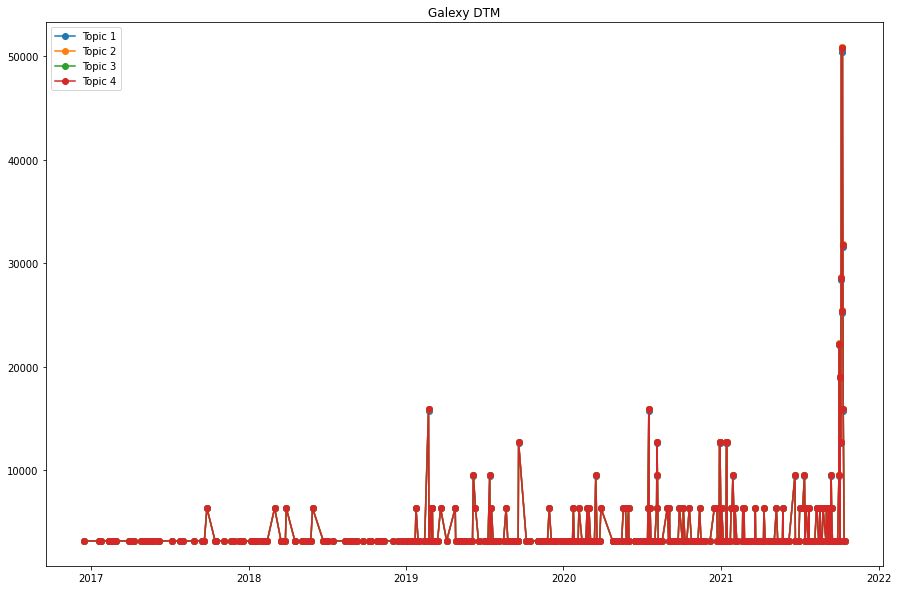

In [160]:
import matplotlib.pyplot as plt
import datetime as dt

tm_x=[]
tm_y=[]

tm_topic_1=tm_topic_array[:,0]
tm_topic_2=tm_topic_array[:,1]
tm_topic_3=tm_topic_array[:,2]
tm_topic_4=tm_topic_array[:,3]
# tm_topic_5=tm_topic_array[:,4] # 파이썬 0부터 시작 주의!!! 
# tm_topic_6=tm_topic_array[:,5]
# tm_topic_6=tm_topic_array[:,6]

tm_unique_date = sorted(list(set(tm_post_date)))

tm_plt_data=[]
for date in tm_unique_date:
    times= dt.datetime.strptime(str(date),'%Y%m%d')
    tm_x.append(times)

plt.rcParams["figure.figsize"]=(15,10)
plt.title("Galexy DTM")
plt.plot(tm_x, tm_topic_1,'o-', label="Topic 1")
plt.plot(tm_x, tm_topic_2,'o-', label="Topic 2")
plt.plot(tm_x, tm_topic_3,'o-', label="Topic 3")
plt.plot(tm_x, tm_topic_4,'o-', label="Topic 4")
# plt.plot(tm_x, tm_topic_5,'o-', label="Topic 5")

plt.legend()
plt.show()

## 각 토픽별 주요단어 추출 및 단어구름으로 시각화
### 각 토픽의 내용을 직관적으로 파악할 수 있도록, 모든 토픽에 공통으로 많이 출현하는 상위 10개 단어를 제외한 중간 수준의 주요 핵심어를 단어구름으로 시각화

In [161]:
from wordcloud import WordCloud

# 아래는 각자에 맞게 단어구름에 속하는 단어 및 상대적 수치 입력하기 

idm_cloud1 = [ ('가격', 10), ('버튼', 9), ('하이브리드', 9), ('정보', 7), ('후드', 7), ('주방', 7), ('에코', 7), ('안심', 6),('오븐', 6), ('전기', 5), ('가스오븐레인지', 5), ('구매', 5), ('확인', 5), ('배터리', 5), ('포스팅', 5), ('전면', 4), ('매립', 4)]  
  
idm_cloud2 = [ ('사용', 12), ('가격', 10), ('에코', 8), ('후드', 8), ('정보', 8), ('오븐', 8), ('하이브리드', 8), ('철거', 7),('안심', 7), ('구매', 6), ('주방', 6), ('상품', 5), ('전기', 5), ('작성', 5), ('매립', 5), ('후기', 4), ('추천', 4)]  

idm_cloud3 = [ ('오븐', 12), ('사용', 9), ('안심', 8), ('가격', 7), ('후드', 7), ('정보', 7), ('전기', 7), ('철거', 6),('하이브리드', 6), ('구매', 6), ('에코', 6), ('주방', 6), ('추천', 5), ('상품', 5), ('작성', 5), ('매립', 5), ('전면', 5)]  
            
idm_cloud4 = [ ('정보', 10), ('사용', 9), ('후드', 9), ('오븐', 8), ('전기', 7), ('에코', 7), ('가격', 7), ('안심', 6),('주방', 6), ('구매', 6), ('매립', 6), ('하이브리드', 5), ('추천', 5), ('가스오븐레인지', 5), ('전면', 5), ('철거', 5), ('포스팅', 5)]  
            

idm_cloud1 = dict(idm_cloud1)
idm_cloud2 = dict(idm_cloud2)
idm_cloud3 = dict(idm_cloud3)
idm_cloud4 = dict(idm_cloud4)

In [162]:
from wordcloud import WordCloud

In [163]:
idm_cloud1 = [ ('버튼', 10), ('자동', 9), ('멀티', 8), ('자식', 7),('선물', 5), ('전기', 5), ('구입', 5), ('가능', 5), ('가격', 5), ('복합', 4), ('정보', 4), ('필요', 4), ('올인원', 4), ('동양', 4), ('자취', 4), ('소개', 4), ('작성', 4)]
  
idm_cloud2 = [ ('구매', 10), ('기능', 10), ('버튼', 8), ('자동', 8), ('멀티', 8),('올인원', 5), ('자식', 5), ('가격', 5), ('전자', 5), ('작성', 5), ('자취', 5), ('동양', 5), ('복합', 5), ('상품', 5), ('가능', 5), ('선물', 5), ('정보', 4), ('필요', 4)] 

idm_cloud3 = [ ('버튼', 8), ('구입', 7), ('가격', 6), ('멀티', 6),('상품', 6), ('자동', 6), ('전자', 5), ('자식', 5), ('복합', 5), ('모델', 4), ('전기', 4), ('정보', 4), ('소개', 4), ('필요', 4), ('글래스', 4), ('자취', 4)] 
            
idm_cloud4 = [ ('자동', 10), ('사용', 9), ('가격', 7), ('버튼', 7), ('자식', 6), ('멀티', 6), ('상품', 6), ('필요', 5), ('전자', 5), ('복합', 4), ('기준', 4), ('가능', 4), ('동양', 4), ('모델', 4), ('구입', 4), ('소개', 4), ('시간', 4), ('자취',4 )]

# idm_cloud5 = [ ('버튼', 11), ('상품', 8), ('멑리', 7), ('가격', 7),('자동', 6), ('구입', 6), ('자식', 6), ('전자', 6), ('복합', 5), ('필요', 5), ('기준', 5), ('올인원', 5), ('가능', 4), ('전기', 4), ('선물',4), ('정보', 4)]

idm_cloud1 = dict(idm_cloud1)
idm_cloud2 = dict(idm_cloud2)
idm_cloud3 = dict(idm_cloud3)
idm_cloud4 = dict(idm_cloud4)
# idm_cloud5 = dict(idm_cloud5)

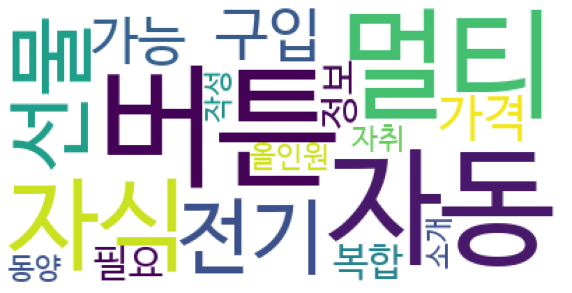

In [166]:

# 토픽수도 말하기 
# 블로그 쇼핑몰 비교 
# 군산대학교가 있다. 
tm_wc = WordCloud(background_color="white", font_path='NanumBarunGothic.ttf')
tm_wc.generate_from_frequencies(idm_cloud1)

import matplotlib.pyplot as plt
figure = plt.figure()
figure.set_size_inches(10, 10)
ax = figure.add_subplot(1, 1, 1)
ax.axis("off")
ax.imshow(tm_wc)

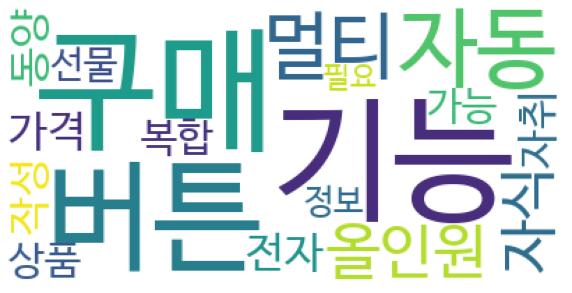

In [167]:
tm_wc = WordCloud(background_color="white", font_path='NanumBarunGothic.ttf')
tm_wc.generate_from_frequencies(idm_cloud2)

import matplotlib.pyplot as plt
figure = plt.figure()
figure.set_size_inches(10, 10)
ax = figure.add_subplot(1, 1, 1)
ax.axis("off")
ax.imshow(tm_wc)

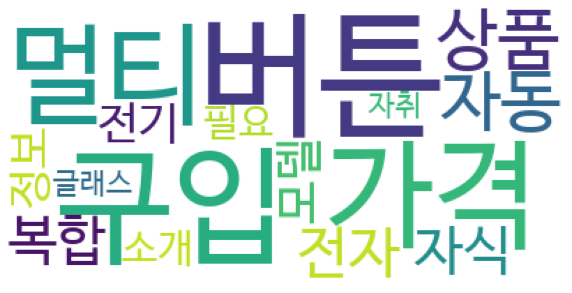

In [168]:
tm_wc = WordCloud(background_color="white", font_path='NanumBarunGothic.ttf')
tm_wc.generate_from_frequencies(idm_cloud3)

import matplotlib.pyplot as plt
figure = plt.figure()
figure.set_size_inches(10, 10)
ax = figure.add_subplot(1, 1, 1)
ax.axis("off")
ax.imshow(tm_wc)

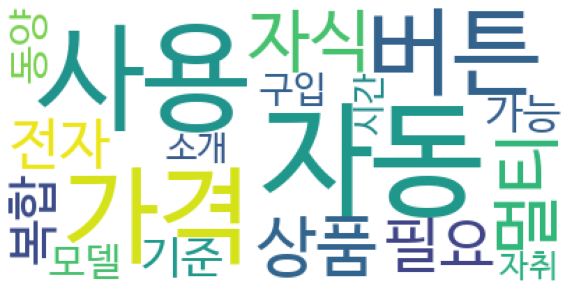

In [169]:
tm_wc = WordCloud(background_color="white", font_path='NanumBarunGothic.ttf')
tm_wc.generate_from_frequencies(idm_cloud4)

import matplotlib.pyplot as plt
figure = plt.figure()
figure.set_size_inches(10, 10)
ax = figure.add_subplot(1, 1, 1)
ax.axis("off")
ax.imshow(tm_wc)

In [52]:
# tm_wc = WordCloud(background_color="white", font_path='NanumBarunGothic.ttf')
# tm_wc.generate_from_frequencies(idm_cloud5)

# import matplotlib.pyplot as plt
# figure = plt.figure()
# figure.set_size_inches(10, 10)
# ax = figure.add_subplot(1, 1, 1)
# ax.axis("off")
# ax.imshow(tm_wc)